<a href="https://colab.research.google.com/github/marcosgabrielll/Aprendizagem_de_maquinas_em_coluna_de_destilacao/blob/main/Coluna_de_destila%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/amarhaiqal/aspen-hysys-distillation-column-data

In [ ]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade gspread
# Criando conexão entre o colab e o google Sheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#Abrindo o arquivo
spreasheet= gc.open('Distillation Column Dataset')
#Abrindo as abas do arquivo
page=spreasheet.sheet1
#olhando os dados 
page.row_values(1)
#Escrevernaplanilha
#page.update('CELULA')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['Time',
 'Sensor1',
 'Sensor2',
 'Sensor3',
 'Sensor4',
 'Sensor5',
 'Sensor6',
 'Sensor7',
 'Sensor8',
 'Sensor9',
 'Sensor10',
 'Sensor11',
 'Sensor12',
 'Sensor13',
 'Sensor14',
 'Sensor15',
 'MoleFractionTX',
 'MoleFractionHX']

In [ ]:
dataset= pd.DataFrame(page.get_all_records())

In [ ]:
dataset.head()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0.965784,0.034216


In [ ]:
dataset.tail()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
956,28680,49.604279,100.903579,54.520579,3783.434579,6808.374579,2782.764579,1052.594579,0.054906,0.501001,0.498999,76.467579,104.034579,110.102579,66.923679,0.792092,0.964851,0.035149
957,28710,50.164408,101.465308,55.073908,3783.905308,6809.155308,2782.875308,1053.235308,0.054913,0.501001,0.498999,77.028608,104.595308,110.663308,67.484408,0.792288,0.964852,0.035148
958,28740,50.332178,101.634378,55.234278,3784.033378,6809.343378,2783.673378,1053.403378,0.054925,0.501001,0.498999,77.196878,104.763378,110.831378,67.652478,0.792515,0.964853,0.035147
959,28770,50.080385,101.384285,54.974485,3783.671285,6808.931285,2782.991285,1053.181285,0.054930,0.501001,0.498999,76.944985,104.511285,110.579285,67.400385,0.792525,0.964853,0.035147
960,28800,50.157894,101.462594,55.042694,3783.638594,6808.978594,2783.658594,1053.218594,0.054937,0.501001,0.498999,77.022694,104.588594,110.656594,67.477694,0.792530,0.964854,0.035146


In [ ]:
dataset.describe()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,9.610000e+02,9.610000e+02,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,14400.000000,49.994889,101.279649,49.555769,3823.335379,6865.768293,2805.781415,1053.164047,0.055029,5.010010e-01,4.989990e-01,76.835812,104.424765,110.492765,67.313865,0.809068,0.964015,0.035985
std,8326.833132,0.292281,0.452364,6.118368,511.213381,755.410384,259.579392,4.997380,0.003787,2.221602e-16,1.110801e-16,0.334343,0.280159,0.280159,0.280159,0.161491,0.008473,0.008473
min,0.000000,48.907668,97.702103,36.812829,3004.403494,5653.363002,2134.576770,1013.589114,0.028320,5.010010e-01,4.989990e-01,75.991528,103.930595,109.998595,66.819695,0.571794,0.950885,0.022401
25%,7200.000000,49.754926,101.033896,44.564921,3408.090531,6252.664563,2601.983148,1049.884770,0.053854,5.010010e-01,4.989990e-01,76.601021,104.183922,110.251922,67.073022,0.639547,0.957287,0.028810
50%,14400.000000,50.001056,101.296977,50.455106,3722.752040,6718.275361,2756.461191,1053.220322,0.054807,5.010010e-01,4.989990e-01,76.832795,104.426582,110.494582,67.315682,0.807521,0.965902,0.034098
75%,21600.000000,50.225012,101.539019,54.766717,4450.433352,7406.035409,3111.691346,1055.451884,0.056485,5.010010e-01,4.989990e-01,77.085614,104.649155,110.717155,67.538255,0.914706,0.971190,0.042713
max,28800.000000,50.807513,103.848213,57.890626,4562.816420,7957.048708,3300.394030,1084.786368,0.084926,5.010010e-01,4.989990e-01,77.891430,104.929458,110.997458,67.818558,1.644580,0.977599,0.049115


In [ ]:
dataset.shape

(961, 18)

In [ ]:
dataset.isnull().sum()

Time              0
Sensor1           0
Sensor2           0
Sensor3           0
Sensor4           0
Sensor5           0
Sensor6           0
Sensor7           0
Sensor8           0
Sensor9           0
Sensor10          0
Sensor11          0
Sensor12          0
Sensor13          0
Sensor14          0
Sensor15          0
MoleFractionTX    0
MoleFractionHX    0
dtype: int64

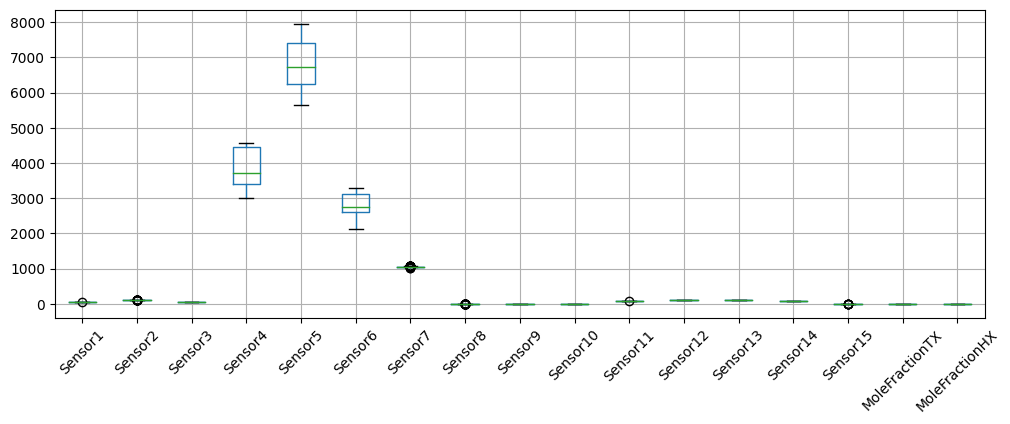

In [ ]:
dataset.boxplot(column = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4','Sensor5', 'Sensor6', 'Sensor7',
       'Sensor8','Sensor9','Sensor10', 'Sensor11', 'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'MoleFractionTX','MoleFractionHX'], rot=45, figsize = (12,4));

array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Sensor1'}>,
        <Axes: title={'center': 'Sensor2'}>,
        <Axes: title={'center': 'Sensor3'}>],
       [<Axes: title={'center': 'Sensor4'}>,
        <Axes: title={'center': 'Sensor5'}>,
        <Axes: title={'center': 'Sensor6'}>,
        <Axes: title={'center': 'Sensor7'}>],
       [<Axes: title={'center': 'Sensor8'}>,
        <Axes: title={'center': 'Sensor9'}>,
        <Axes: title={'center': 'Sensor10'}>,
        <Axes: title={'center': 'Sensor11'}>],
       [<Axes: title={'center': 'Sensor12'}>,
        <Axes: title={'center': 'Sensor13'}>,
        <Axes: title={'center': 'Sensor14'}>,
        <Axes: title={'center': 'Sensor15'}>],
       [<Axes: title={'center': 'MoleFractionTX'}>,
        <Axes: title={'center': 'MoleFractionHX'}>, <Axes: >, <Axes: >]],
      dtype=object)

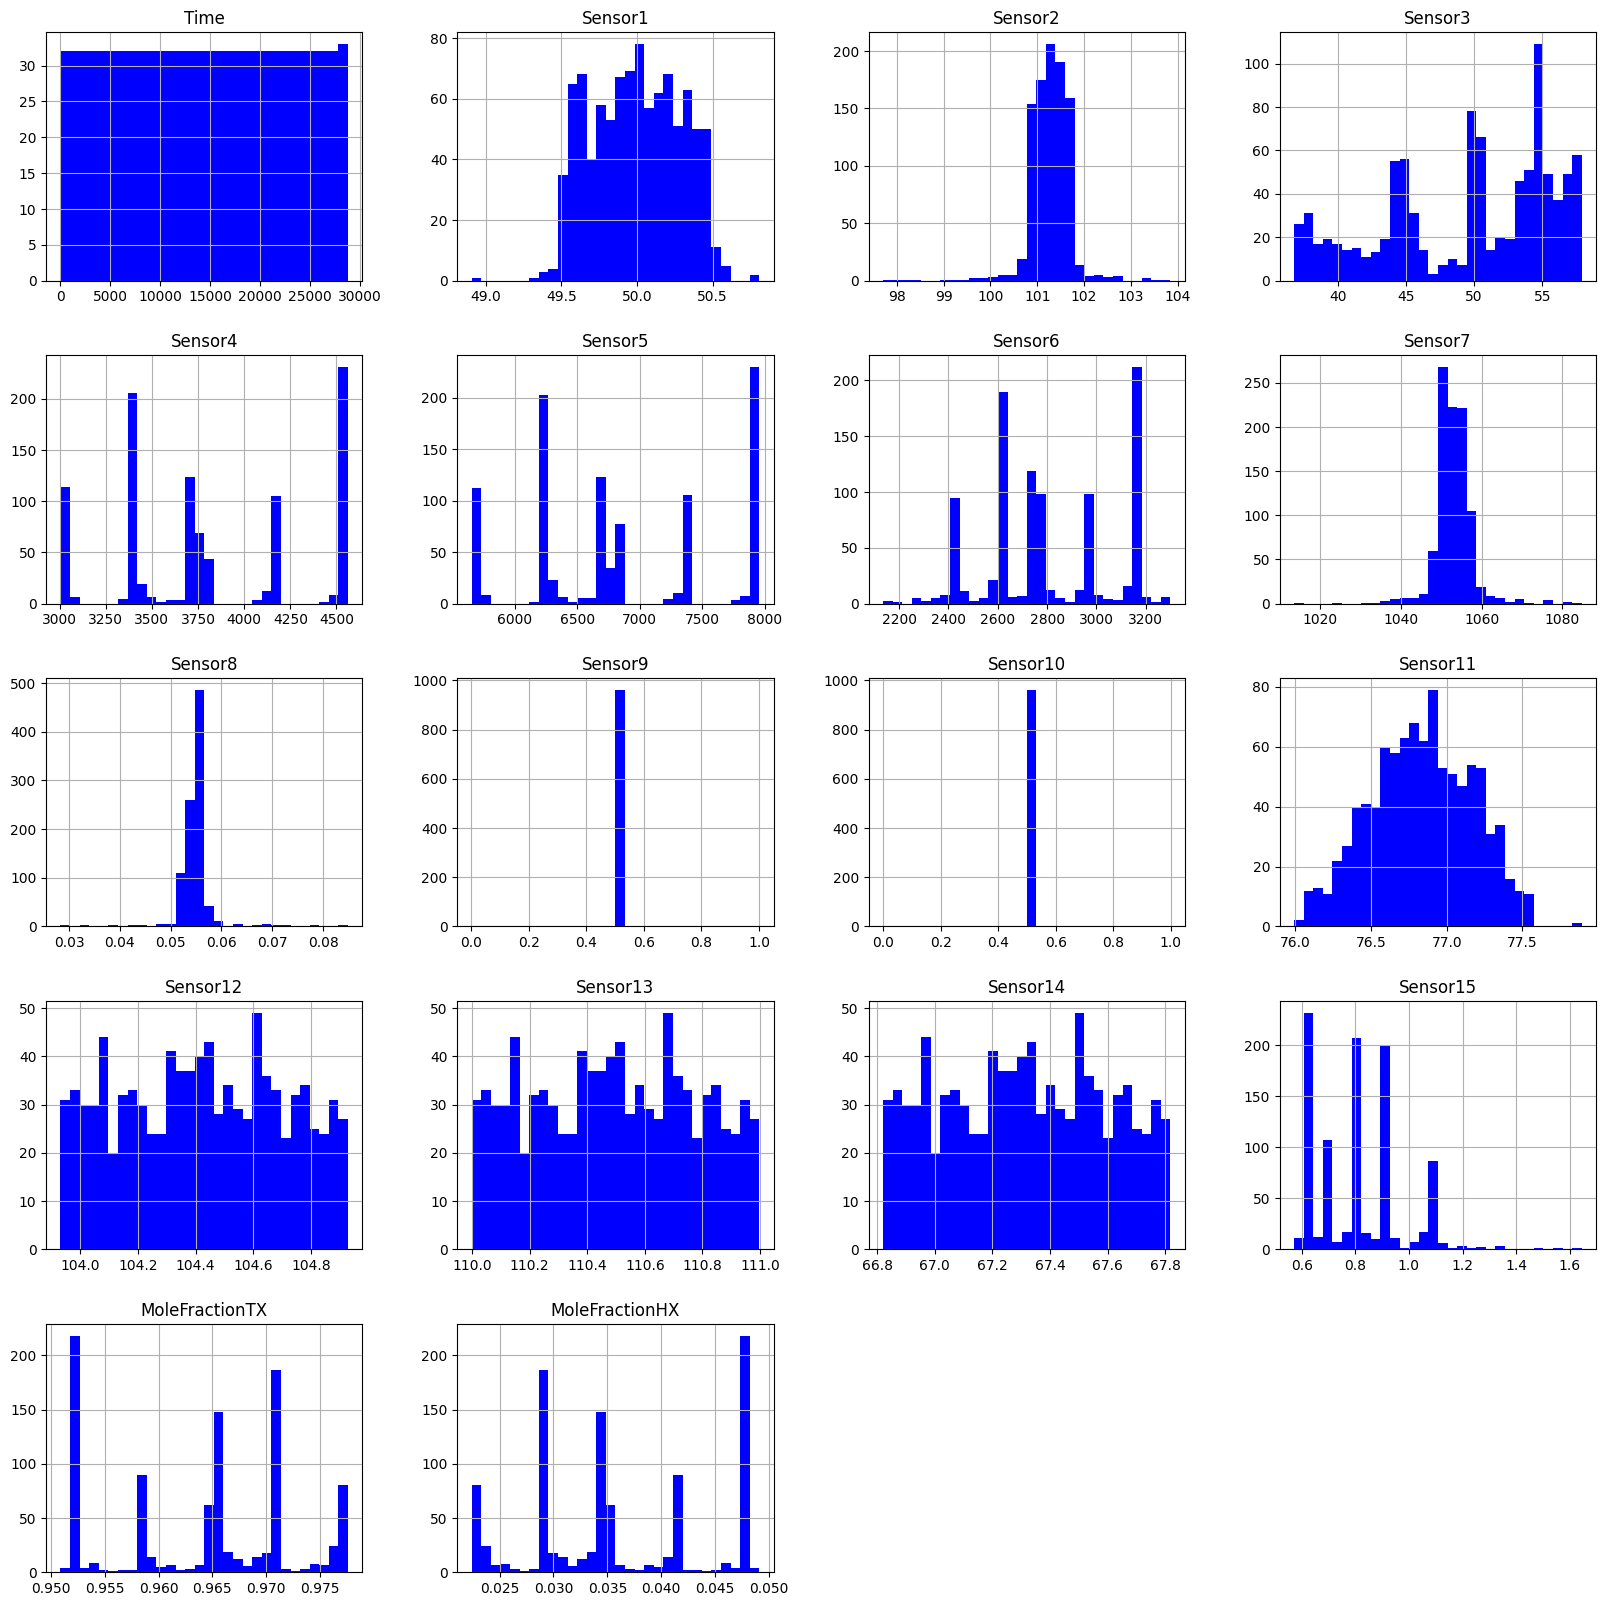

In [ ]:
dataset.hist(bins = 30, figsize=(20, 20), color = 'b')

In [ ]:
dataset.shape

(961, 18)

In [ ]:
for col in dataset.columns:
    if len(dataset[col].unique()) == 1:
        print( {col} )

{'Sensor9'}
{'Sensor10'}


In [ ]:
dataset=dataset.drop(['Sensor9'], axis=1)
dataset=dataset.drop(['Sensor10'], axis=1)
dataset.head()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,76.803959,104.148959,110.216959,67.038059,0.798463,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,76.437645,103.977045,110.045045,66.866145,0.800811,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,77.041465,104.608865,110.676865,67.497965,0.803544,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,77.016096,104.609296,110.677296,67.498396,0.807065,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,77.252293,104.864693,110.932693,67.753793,0.811774,0.965784,0.034216


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Ajuste os dados
scaled_data = scaler.fit_transform(dataset)


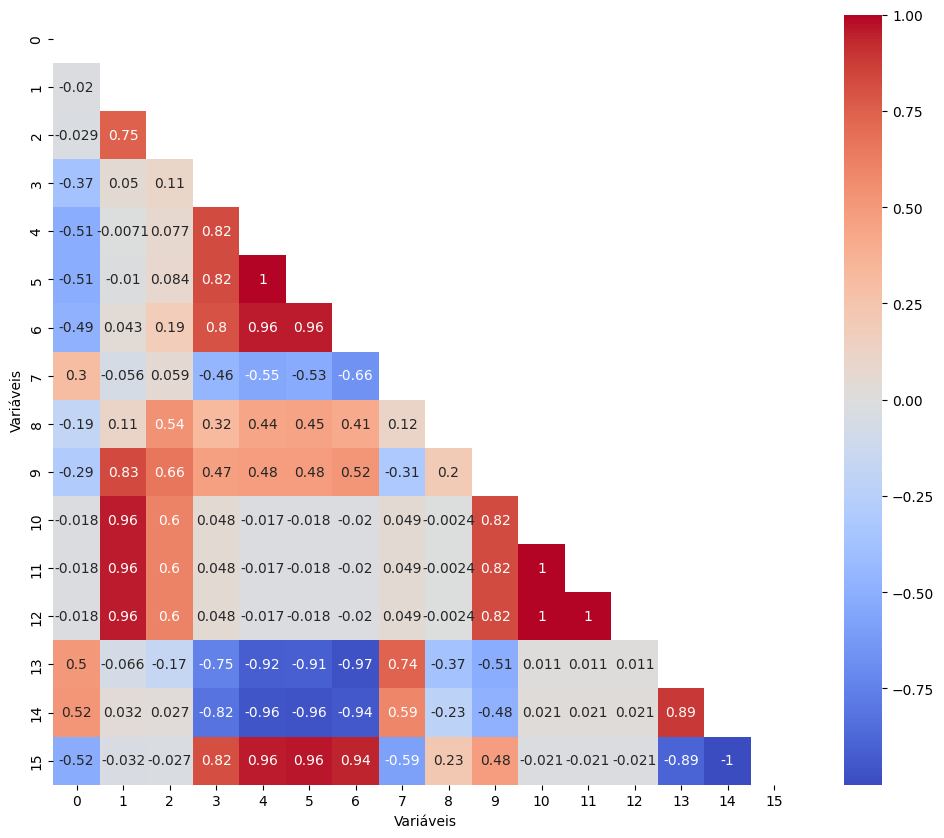

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcule a matriz de correlação usando numpy.corrcoef()
corr_matrix = np.corrcoef(scaled_data, rowvar=False)

# Crie uma máscara para remover a diagonal principal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configure o tamanho da figura
plt.figure(figsize=(12, 10))

# Plote a matriz de correlação usando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)

# Defina os rótulos dos eixos
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')

# Exiba o gráfico
plt.show()



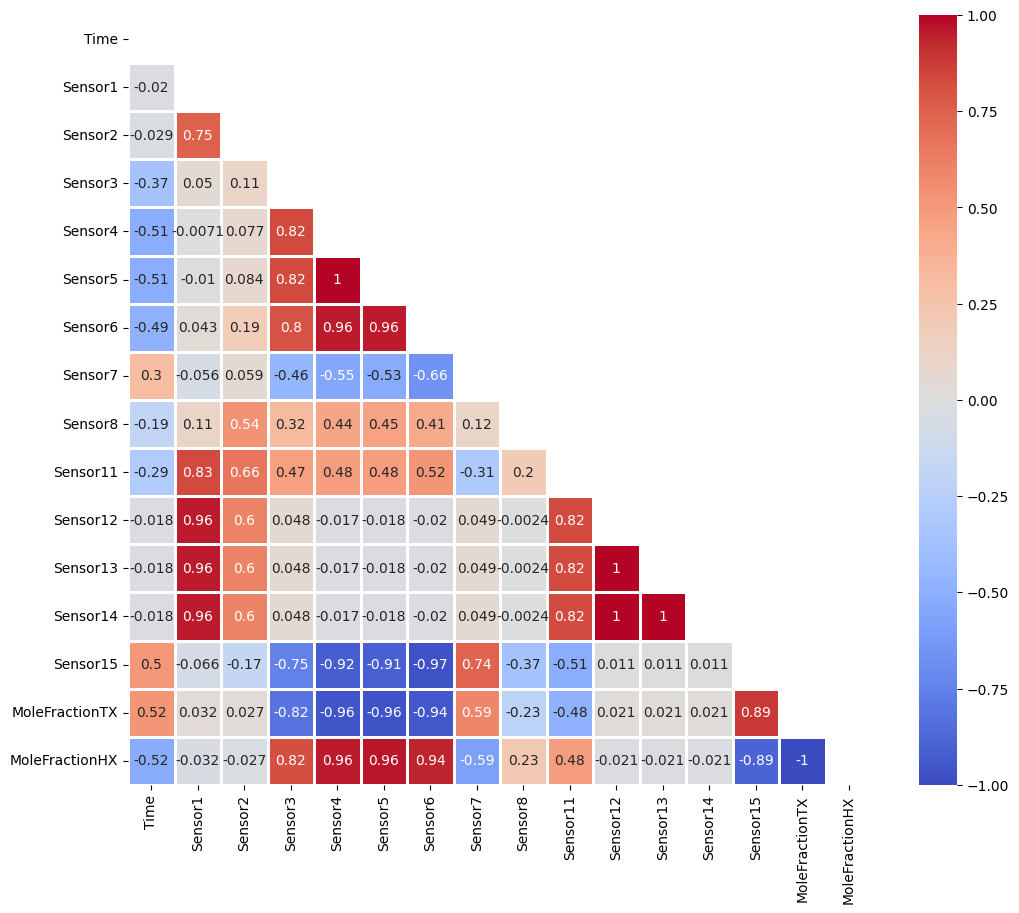

In [ ]:
corr = dataset.corr() # Matriz de correlaçao
lower_triangle = np.tril(corr, k = -1)  # seleciona o menor triangula da matriz
mask = lower_triangle == 0 # Apaga a diagonal do mapa de calor, pois a diagonal sempre seré 1
#coolwarm
#rocket
plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask, vmin = -1, vmax = +1)   # mapa de calor
plt.show()

In [ ]:
dataset.corr()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
Time,1.000000,-0.019574,-0.029011,-0.368683,-0.513477,-0.512541,-0.492081,0.302717,-0.187222,-0.294419,-0.018131,-0.018131,-0.018131,0.500055,0.516353,-0.516352
Sensor1,-0.019574,1.000000,0.746864,0.050232,-0.007076,-0.010455,0.042869,-0.056226,0.114151,0.833498,0.958142,0.958142,0.958142,-0.065869,0.031536,-0.031535
Sensor2,-0.029011,0.746864,1.000000,0.105490,0.076542,0.084225,0.186376,0.058721,0.535252,0.659595,0.603224,0.603224,0.603224,-0.170118,0.026545,-0.026544
Sensor3,-0.368683,0.050232,0.105490,1.000000,0.822167,0.823246,0.799410,-0.460723,0.317811,0.465501,0.048020,0.048020,0.048020,-0.745673,-0.815105,0.815104
Sensor4,-0.513477,-0.007076,0.076542,0.822167,1.000000,0.998642,0.959892,-0.552521,0.441386,0.479340,-0.017119,-0.017119,-0.017119,-0.916069,-0.959240,0.959240
Sensor5,-0.512541,-0.010455,0.084225,0.823246,0.998642,1.000000,0.959797,-0.529631,0.448470,0.480445,-0.018120,-0.018120,-0.018120,-0.911593,-0.961166,0.961166
Sensor6,-0.492081,0.042869,0.186376,0.799410,0.959892,0.959797,1.000000,-0.662790,0.409924,0.518584,-0.020238,-0.020238,-0.020238,-0.969132,-0.941967,0.941967
Sensor7,0.302717,-0.056226,0.058721,-0.460723,-0.552521,-0.529631,-0.662790,1.000000,0.117106,-0.313934,0.049303,0.049303,0.049303,0.738440,0.590367,-0.590366
Sensor8,-0.187222,0.114151,0.535252,0.317811,0.441386,0.448470,0.409924,0.117106,1.000000,0.202800,-0.002392,-0.002392,-0.002392,-0.369369,-0.226468,0.226469
Sensor11,-0.294419,0.833498,0.659595,0.465501,0.479340,0.480445,0.518584,-0.313934,0.202800,1.000000,0.824889,0.824889,0.824889,-0.513030,-0.481795,0.481795


In [ ]:
Colunas=dataset[["Sensor3","Sensor4","Sensor5","Sensor6","Sensor7","Sensor11","Sensor15","MoleFractionTX"]]

In [ ]:
X = Colunas.drop('MoleFractionTX',axis=1)
y = Colunas['MoleFractionTX']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Cálculos de erros

In [ ]:
def calcular_mae(y, y_pred):
  erro = y - y_pred
  erro_absoluto = np.absolute(erro)
  return erro_absoluto.mean()
def calcular_mse(y, y_pred):
  erro = y - y_pred
  erro_quadratico = erro ** 2
  return erro_quadratico.mean()

## Modelo Linear

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_linear = LinearRegression()
modelo_linear

modelo_linear.fit(X_train, y_train)
modelo_linear

LinearRegression()

In [ ]:
modelo_linear.score(X_train, y_train)

0.9543725982771022

In [ ]:
y_pred_train = modelo_linear.predict(X_train)
y_pred_test = modelo_linear.predict(X_test)

In [ ]:
# Cálculo de MAE
mae_train = calcular_mae(y_train, y_pred_train)
mae_test = calcular_mae(y_test, y_pred_test)
print("MAE treino:", mae_train)
print("MAE teste:", mae_test)

MAE treino: 0.0008472802598824124
MAE teste: 0.0009688719026220463


In [ ]:
# Cálculo de MSE
mse_train = calcular_mse(y_train, y_pred_train)
mse_test = calcular_mse(y_test, y_pred_test)
print("Estatística para o Modelo LiNEAR","\n")
print("Score de Treino:", modelo_linear.score(X_train, y_train),"\n")
print("Score de Teste:", modelo_linear.score(X_test, y_test),"\n")
print("MSE treino:", mse_train,"\n")
print("MSE teste:", mse_test,"\n")

Estatística para o Modelo LiNEAR 

Score de Treino: 0.9540062643174699 

Score de Teste: 0.9248280578216038 

MSE treino: 3.273244861198742e-06 

MSE teste: 5.468162097230261e-06 



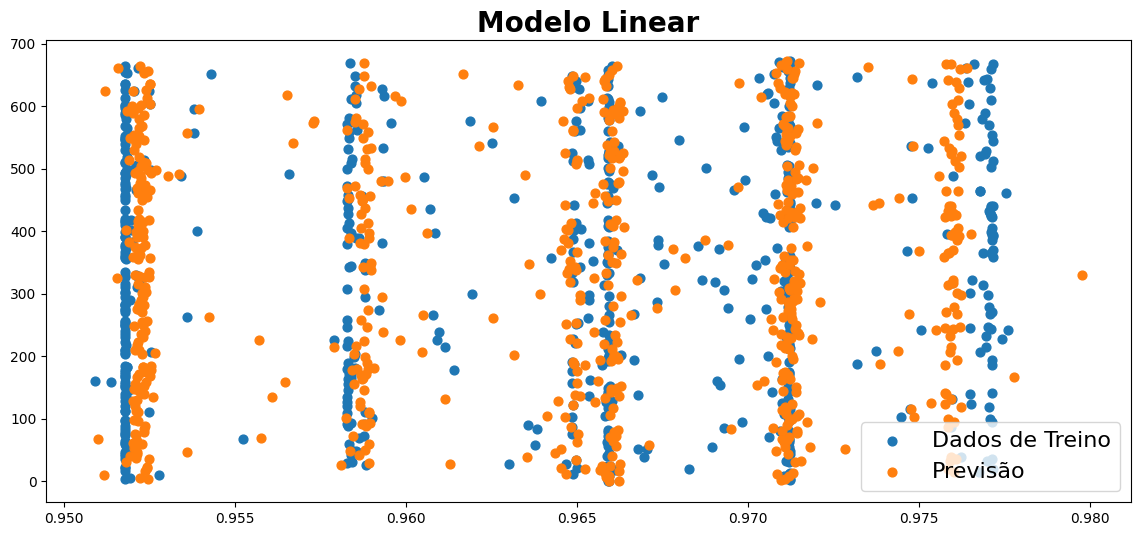

In [ ]:
fig, variav=plt.subplots(figsize=(14,6))
leituras = np.linspace(0, len(y_train), len(y_train))
variav.scatter(np.asarray(y_train).reshape(-1),leituras,label='Dados de Treino',s=40);
variav.scatter(np.asarray(y_pred_train).reshape(-1),leituras,label='Previsão',s=40);

plt.legend(fontsize=16, frameon=True, framealpha=0.8, facecolor='white');
variav.set_title('Modelo Linear', fontsize=20, fontweight='bold');

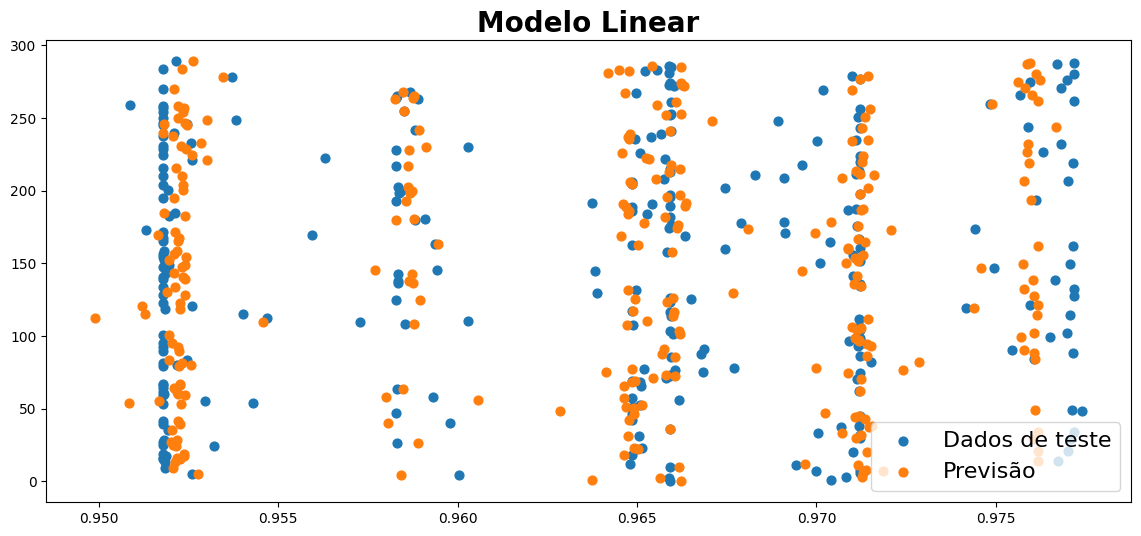

In [ ]:
fig, variav=plt.subplots(figsize=(14,6))
leituras = np.linspace(0, len(y_test), len(y_test))
variav.scatter(np.asarray(y_test).reshape(-1),leituras,label='Dados de teste',s=40);
variav.scatter(np.asarray(y_pred_test).reshape(-1),leituras,label='Previsão',s=40);

plt.legend(fontsize=16, frameon=True, framealpha=0.8, facecolor='white');
variav.set_title('Modelo Linear', fontsize=20, fontweight='bold');

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[3170.92231055 3232.59813249 3169.96903869 2984.82394052 3434.54984539
 3654.49316881 2983.24077494 2989.55713777 2983.99249771 3657.95835457
 3169.35905971 2989.61926433 2991.8992553  3658.844311   2759.80804017
 3659.0983181  3658.91564707 3658.71995156 3207.52699161 3658.92674132
 2984.43402415 2760.67340352 3208.04784997 3208.65801742 3658.2829143
 3658.12048014 3433.62127477 3658.41823444 3658.93897335 2760.12710156
 2983.59579731 3207.31581454 2983.35853937 2988.48255625 2760.87374662
 3657.48962169 3170.66549361 2986.23673887 2983.76556882 3658.98086595
 3435.79969191 3658.52352616 3207.96383001 2983.1691201  2983.36041701
 2982.97928413 3208.48566589 3487.84317398 3040.41720602 2760.57256758
 3208.40477721 3207.63479753 3207.83372105 3659.27969799 3668.10694728
 3659.55394254 3360.79390654 3207.49248611 3433.75952962 3659.33352166
 3659.11486523 3659.0119528  2982.66223203 3432.30553327 3658.93773932
 3207.07002744 3658.94550096 3658.79057066 3207.20530427 3208.2675632
 2982.91

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Variáveis de entrada (amostras)
X = np.array([[1, 2, 3, 4, 5, 6, 7],
              [2, 4, 6, 8, 10, 12, 14],
              [3, 6, 9, 12, 15, 18, 21]])

# Variável de saída correspondente às amostras de entrada
y = np.array([10, 20, 30])

# Criar um objeto do modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os dados de entrada e saída
model.fit(X.T, y)

# Dados de entrada para fazer previsões
X_test = np.array([[4, 8, 12, 16, 20, 24, 28],
                   [5, 10, 15, 20, 25, 30, 35]])

# Fazer previsões usando o modelo treinado
predictions = model.predict(X_test.T)

# Imprimir as previsões
print(predictions)


ValueError: ignored

## Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
modelo_arvore = DecisionTreeRegressor()
modelo_arvore.fit(X_train, y_train)
train_score = modelo_arvore.score(X_train, y_train)
test_score = modelo_arvore.score(X_test, y_test)

print("Score treino:", train_score)
print("Score teste:", test_score)


Score treino: 1.0
Score teste: 0.9710804778328371


In [ ]:
y_pred_train_a = modelo_arvore.predict(X_train)
y_pred_test_a = modelo_arvore.predict(X_test)

In [ ]:
# Cálculo de MSE
mse_train = calcular_mse(y_train, y_pred_train)
mse_test = calcular_mse(y_test, y_pred_test)
print("Estatística para o Modelo Arvore de decisão","\n")
print("Score de Treino:", modelo_arvore.score(X_train, y_train),"\n")
print("Score de Teste:", modelo_arvore.score(X_test, y_test),"\n")
print("MSE treino:", mse_train,"\n")
print("MSE teste:", mse_test,"\n")

Estatística para o Modelo Arvore de decisão 

Score de Treino: 1.0 

Score de Teste: 0.9710804778328371 

MSE treino: 3.273244861198742e-06 

MSE teste: 5.468162097230261e-06 



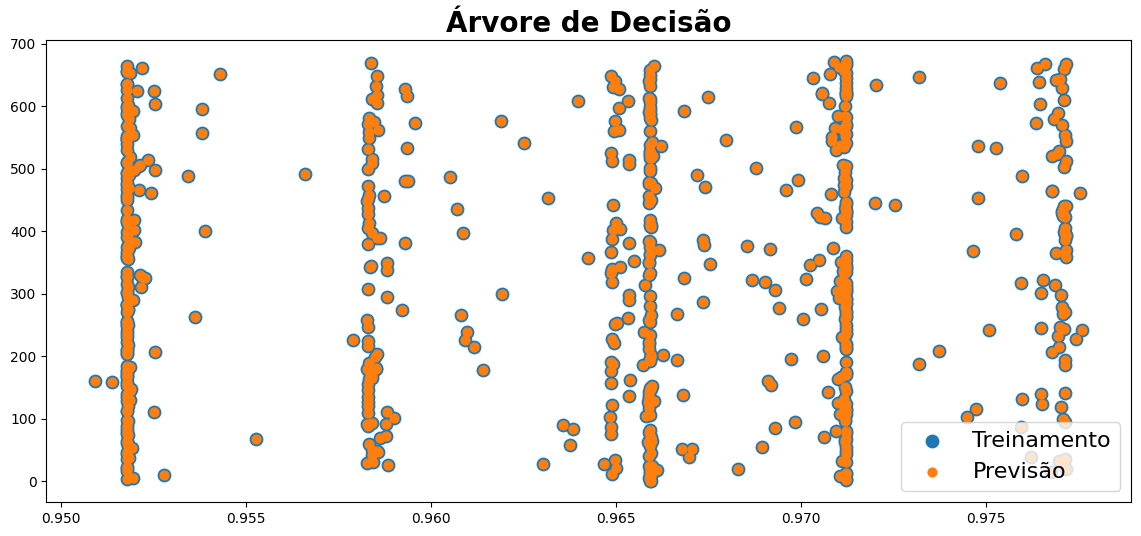

In [ ]:
fig, variav=plt.subplots(figsize=(14,6))
leituras = np.linspace(0, len(y_train), len(y_train))
variav.scatter(np.asarray(y_train).reshape(-1),leituras,label='Treinamento',s=80);
variav.scatter(np.asarray(y_pred_train_a).reshape(-1),leituras,label='Previsão',s=40);

plt.legend(fontsize=16, frameon=True, framealpha=0.8, facecolor='white');
variav.set_title('Árvore de Decisão', fontsize=20, fontweight='bold');

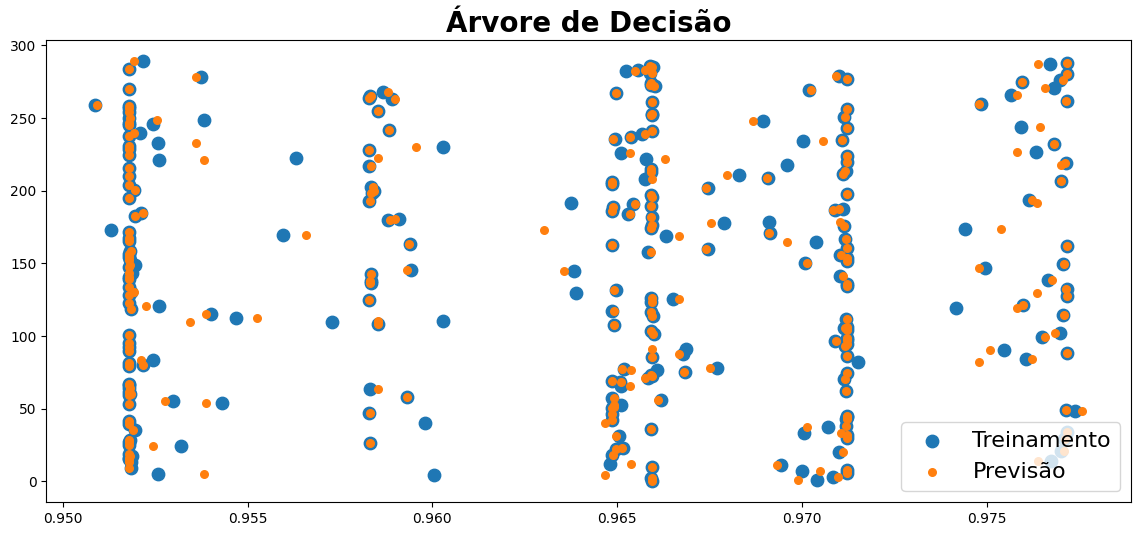

In [ ]:
fig, variav=plt.subplots(figsize=(14,6))
leituras = np.linspace(0, len(y_test), len(y_test))
variav.scatter(np.asarray(y_test).reshape(-1),leituras,label='Treinamento',s=80);
variav.scatter(np.asarray(y_pred_test_a).reshape(-1),leituras,label='Previsão',s=30);

plt.legend(fontsize=16, frameon=True, framealpha=0.8, facecolor='white');
variav.set_title('Árvore de Decisão', fontsize=20, fontweight='bold');

## Floresta aleatória

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_floresta = RandomForestClassifier()
# y_train.values.ravel() é necessário pois: 
# Um vetor coluna y foi passado quando uma matriz 1d era esperada.
modelo_floresta.fit(X_train, y_train)

ValueError: ignored